<a href="https://colab.research.google.com/github/perigee/musee/blob/master/musee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import datasource
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np

In [20]:
cities = datasource.readCSV('population.csv')
mdata = datasource.getDatasource()
validCities = cities[~cities['international'].isnull()]
vmdata = mdata[~mdata['international'].isnull()]
validCities['ratiopi'] = validCities['population']/validCities['international']
print(cities)
print(validCities)

                city  population  international
0           shanghai      24.800          3.120
1          melbourne       4.820          2.782
2            beijing      21.710          7.200
3              gansu       2.400            NaN
4           hangzhou       7.270          0.900
5          chongqing      14.300            NaN
6            nanjing       8.330            NaN
7              xi'an       4.800          1.210
8              paris      10.840         17.440
9           florence       0.700          4.878
10             tokyo      37.340         11.930
11       mexico city      21.500          2.980
12         amsterdam       1.120          6.570
13          oświęcim       0.040            NaN
14            moscow      12.400          4.632
15  saint petersburg       5.320          2.856
16             seoul       9.770          9.540
17            madrid       6.500          5.260
18         kaohsiung       2.770            NaN
19            taipei       2.670        

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


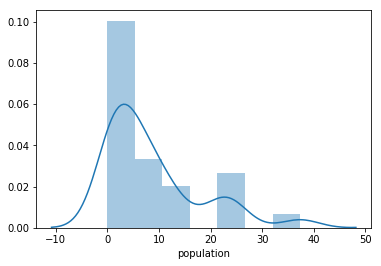

In [10]:
sns.distplot(cities.population)

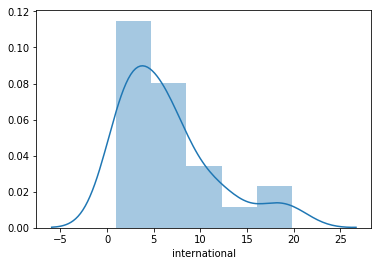

In [13]:
sns.distplot(validCities.international)

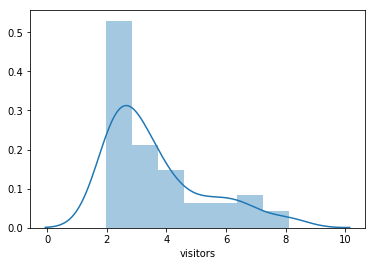

In [48]:
sns.distplot(mdata.visitors)

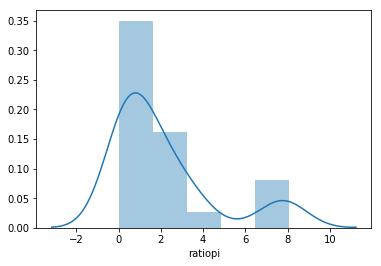

In [17]:
sns.distplot(validCities.ratiopi)

,museum,city,visitors,year,population,international,art,history,science,nature,culture
0,Louvre,paris,8.100000,2017,10.840,17.440,1,1,0,0,0
1,Centre Pompidou,paris,3.371000,2017,10.840,17.440,1,0,0,0,0
2,Musée d'Orsay,paris,3.178000,2017,10.840,17.440,1,0,0,0,0
3,Cité des Sciences et de l'Industrie,paris,2.439000,2017,10.840,17.440,0,0,1,0,0
4,National Museum of China,beijing,8.062625,2017,21.710,7.200,1,1,0,0,0
5,China Science and Technology Museum,beijing,3.983000,2017,21.710,7.200,0,0,1,0,0
6,National Air and Space Museum,washington d.c.,7.000000,2017,0.700,2.154,0,0,1,0,0
7,National Museum of Natural History,washington d.c.,6.000000,2017,0.700,2.154,0,0,0,1,0
8,National Gallery of Art,washington d.c.,5.232000,2017,0.700,2.154,1,0,0,0,0
9,National Museum of American History,washington d.c.,3.800000,2017,0.700,2.154,0,1,0,0,0


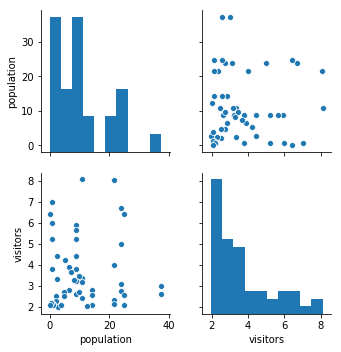

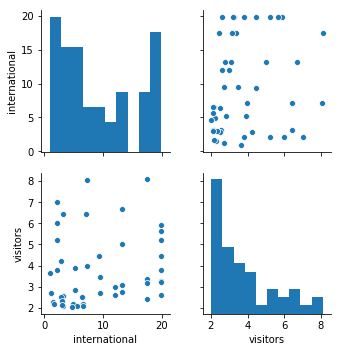

In [21]:
sns.pairplot(mdata[['population', 'visitors']])

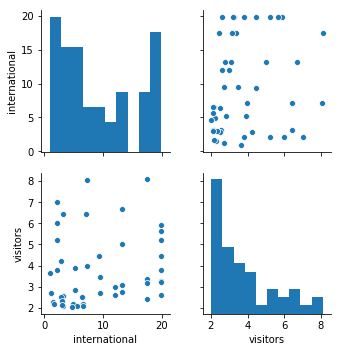

In [24]:
sns.pairplot(vmdata[['international', 'visitors']])

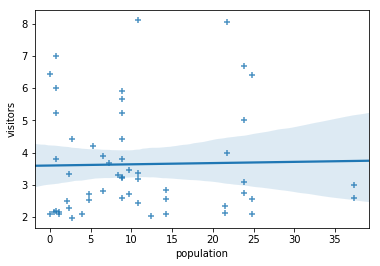

In [22]:
ax = sns.regplot(x=mdata['population'], y=mdata['visitors'], marker="+")

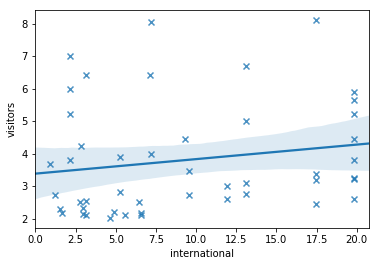

In [23]:
ax = sns.regplot(x=vmdata['international'], y=vmdata['visitors'], marker="x")

In [27]:
model = sm.OLS(mdata['visitors'], mdata['population']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               visitors   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     49.54
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           3.91e-09
Time:                        20:02:47   Log-Likelihood:                -133.48
No. Observations:                  54   AIC:                             269.0
Df Residuals:                      53   BIC:                             271.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.1927      0.027      7.039      0.000       0.138       0.248
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.715
Skew:                          -0.227   Prob(JB):                        0.700
Kurtosis:                       3.334   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vmodel = sm.OLS(vmdata['visitors'], vmdata['international']).fit()
vmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               visitors   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     73.55
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           4.24e-11
Time:                        20:04:11   Log-Likelihood:                -111.11
No. Observations:                  47   AIC:                             224.2
Df Residuals:                      46   BIC:                             226.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
international     0.2854      0.033      8.576      0.000       0.218       0.352
==============================================================================
Omnibus:                        1.206   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.197
Skew:                           0.350   Prob(JB):                        0.550
Kurtosis:                       2.654   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm = LinearRegression(fit_intercept=False).fit(mdata[['population']], mdata['visitors'])
lm.coef_

array([0.19273227])

In [50]:
vlm = LinearRegression(fit_intercept=False).fit(vmdata[['international']], vmdata['visitors'])
vlm.coef_

array([0.28541658])

In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()